In [26]:
from pathlib import Path
import pandas as pd
import numpy as np
from ebm.probability import log_distributions, fit_distributions
from ebm.mcmc import greedy_ascent, mcmc

import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')

train1 = pd.read_csv(folder / 'ENIGMA-PD-regional.csv', index_col=0)
train2 = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)

In [ ]:
/data01/bgutman/MRI_data/PPMI/EBM_data/corrected_ENIGMA-PD_Mixed_Effects_train_
test_split.csv

In [3]:
X = train2.drop(['SubjID', 	'Dx', 	'Sex', 	'Age', 	'cohort'], axis=1).values
y = train2['Dx'].values

In [4]:
X.shape, y.shape

((1936, 68), (1936,))

In [5]:
log_p_e, log_p_not_e = log_distributions(X, y)

In [18]:
np.unique(log_p_e).min(), np.unique(log_p_e).max()

(-13.402521393890327, 4.886712315401897e-07)

In [19]:
np.unique(log_p_not_e).min(), np.unique(log_p_not_e).max()

(-13.815510557964274, 9.999994999180668e-07)

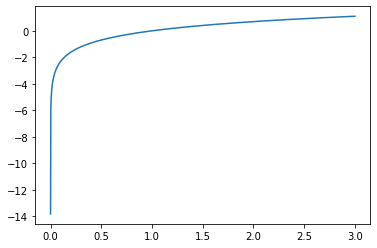

In [25]:
plt.plot(np.linspace(1e-6, 3, 1000), np.log(np.linspace(1e-6, 3, 1000)));

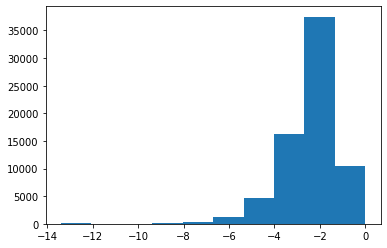

In [22]:
plt.hist(np.unique(log_p_e));

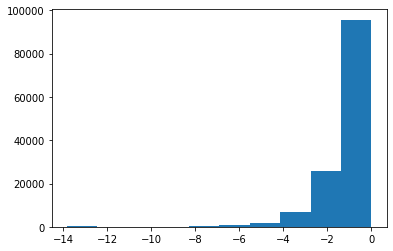

In [23]:
plt.hist(np.unique(log_p_not_e));

In [27]:
order, loglike, update_iters = greedy_ascent(log_p_e, log_p_not_e, n_iter=100_000)

100%|██████████| 100000/100000 [04:46<00:00, 349.44it/s]


In [ ]:
np.save

In [91]:
# orders, loglike, update_iters, probas = mcmc(log_p_e, log_p_not_e, order=order, n_iter=100_000)

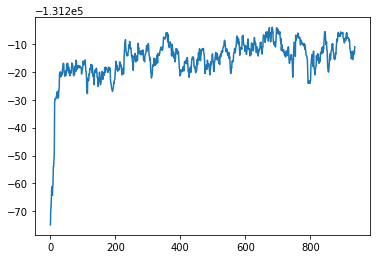

In [38]:
plt.plot(loglike)

In [94]:
loglike

[-131274.8445429751,
 -131269.57274964754,
 -131268.3448559134,
 -131264.86268022063,
 -131261.67020870408,
 -131261.12150040746,
 -131264.22770395078,
 -131261.67091486257,
 -131260.1076914032,
 -131253.98349408555,
 -131253.93067155188,
 -131251.127462348,
 -131248.76132149593,
 -131231.06225421565,
 -131229.86208993543,
 -131229.59685277857,
 -131229.86208993543,
 -131229.45219131006,
 -131229.1869541729,
 -131228.47331697025,
 -131227.24287252701,
 -131227.326526009,
 -131229.29455970466,
 -131226.95936917685,
 -131229.382993986,
 -131229.20820252653,
 -131226.47096459882,
 -131225.9254578639,
 -131220.74974781982,
 -131220.70008418162,
 -131220.0177124976,
 -131220.067376146,
 -131221.81039003946,
 -131220.57407882766,
 -131220.31780817718,
 -131220.8145272233,
 -131221.0825508119,
 -131219.07206528162,
 -131218.76071463307,
 -131217.21690779435,
 -131216.95517005777,
 -131217.21690779435,
 -131220.1152989199,
 -131220.07020329303,
 -131221.55931769905,
 -131220.0377983659,
 -1312

In [92]:
probas

[1.6115781905601456,
 194.7649267583522,
 3.4140311009129127,
 32.53042134056417,
 24.348530936323364,
 1.731015614416917,
 0.044770602761189666,
 12.894348159720867,
 4.774185862421696,
 456.7779184995735,
 1.0542425359683019,
 16.497505767560774,
 10.656189020714372,
 48596753.21087792,
 3.3206623970812394,
 1.303740130026491,
 0.7670240233992649,
 1.5066650397547043,
 1.3037401043385173,
 2.041402767468106,
 3.4227504165684626,
 0.919749910784196,
 0.1397313406093203,
 10.331428166249317,
 0.08859987704439097,
 1.1909978193841946,
 15.44426794500033,
 1.7254825231356068,
 176.92219224230809,
 1.050917548402485,
 1.978564702334115,
 0.9515494258371363,
 0.17499219720409748,
 3.4428899202608574,
 1.2921023887554985,
 0.6085239269563512,
 0.7648897382063834,
 7.466941893707548,
 1.365267866465422,
 4.682381456425429,
 1.2991857688451356,
 0.7697128647652245,
 0.055111816760738556,
 1.0461278930680127,
 0.22557233260892298,
 4.579177208340077,
 1.2219479861867668,
 0.20472786707235385,


In [93]:
np.log(6.423888092909092)

1.8600235563353635

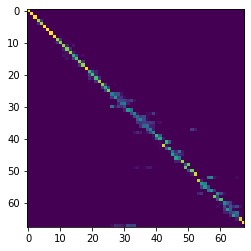

In [90]:
plt.imshow(order_map[best_order]);